In [8]:
%matplotlib inline
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs  # for plotting map
from sklearn.preprocessing import MinMaxScaler

In [9]:
pathwrf = 'C:\\Users\\bobby\\Desktop\\.vscode\\1 UROP Research\\UROP v2\\raw_preprocessing\\WRF\\'
# pathwrf = 'P:\\WRF_3domain_fERA5\\jack'
dswrf = xr.open_dataset(pathwrf + 'd02WRF_tp_2000_2019.nc')
dswrf = dswrf.isel(south_north=slice(10,106), west_east=slice(18,150))
wrf_train = dswrf.sel(Time=slice(0, 20457))

# reading variable files
PATH = 'C:\\Users\\bobby\\Desktop\\.vscode\\1 UROP Research\\UROP v2\\raw_preprocessing\\GEFS\\'
# PATH = 'P:\\WRF_3domain_fERA5\\jack'
ds_reanalysis_tp = xr.open_dataset(PATH + 'GEFSv12-Reanalysis_tp_2000_2019.nc') # only 1 single reanalysis tp
ds_reforecast_apcp = xr.open_dataset(PATH + 'GEFSv12-Reforecast_apcp_2000_2019.nc') # may add more variables in future

# slicing dimensions 8 x 11 grid points
ds_reanalysis_tp = ds_reanalysis_tp.sel(lon=slice('102.5', '105.00'), lat=('2.5','2.25','2','1.75','1.5','1.25','1','0.75'))
ds_reforecast_apcp = ds_reforecast_apcp.sel(longitude=slice('102.5', '105.00'), latitude=('2.5','2.25','2','1.75','1.5','1.25','1','0.75'))

# starting from 2000-01-01 06:00:00 to 2019-12-31 18:00:00, total 29219 time steps
ds_reanalysis_tp = ds_reanalysis_tp.isel(time=slice(1, None)) 
del ds_reanalysis_tp.attrs['history'] # remove long history text
ds_train_apcp = ds_reforecast_apcp.sel(time=slice('2000-01-01T06', '2014-01-01T06'))
y_train = ds_reanalysis_tp.sel(time=slice('2000-01-01T06', '2014-01-01T06'))

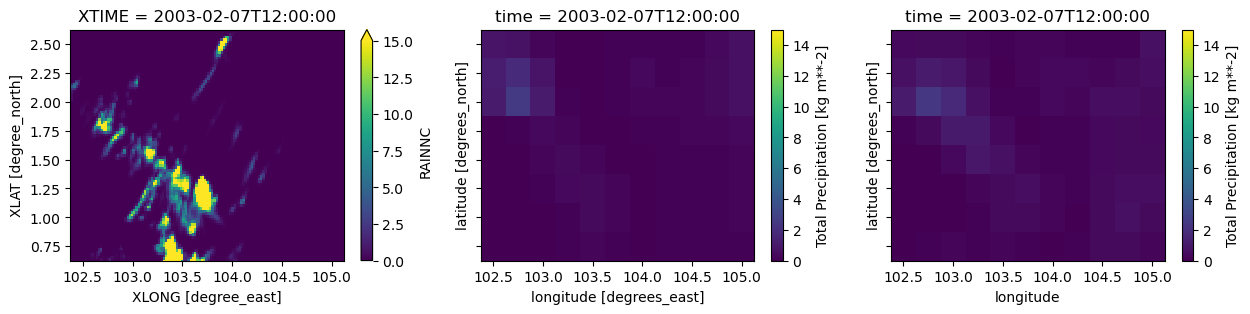

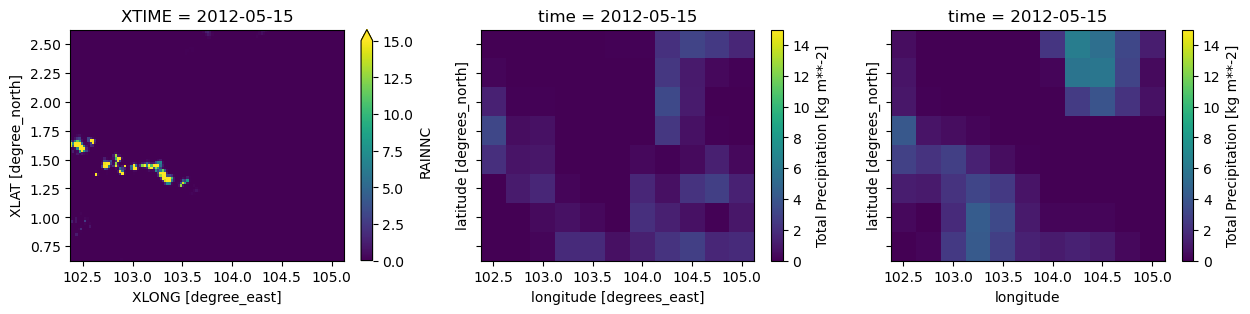

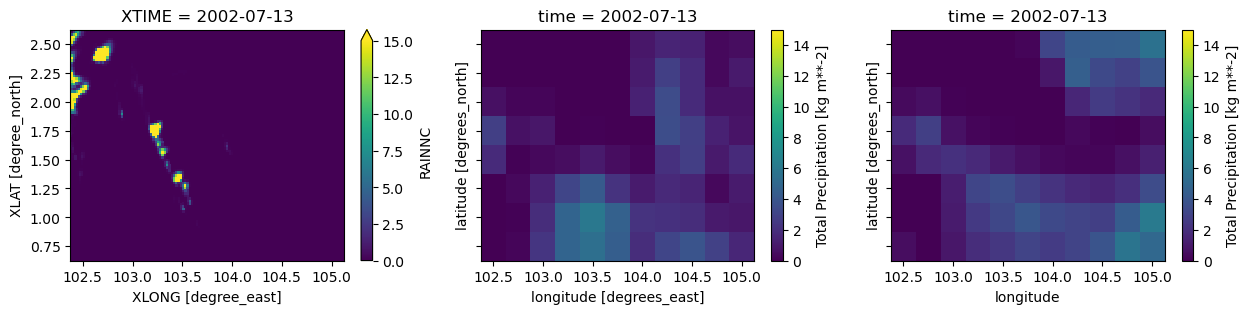

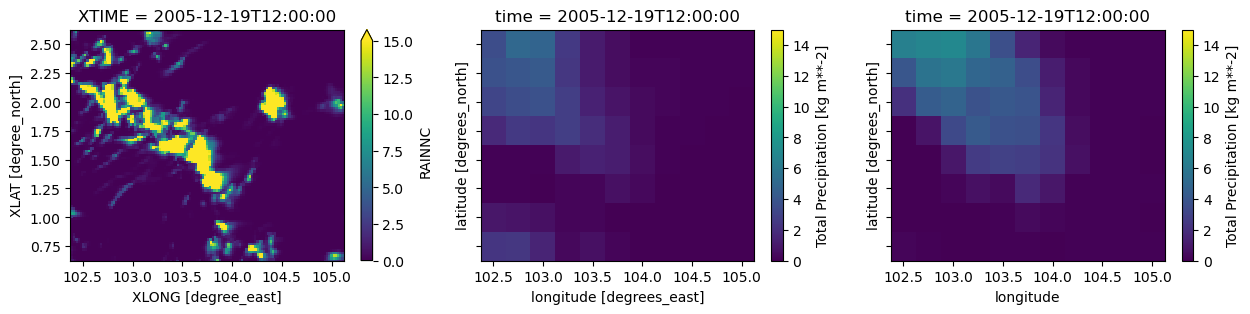

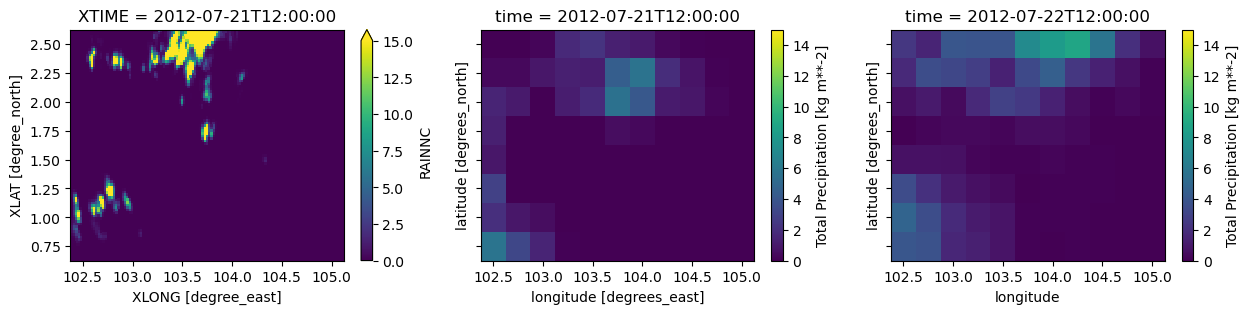

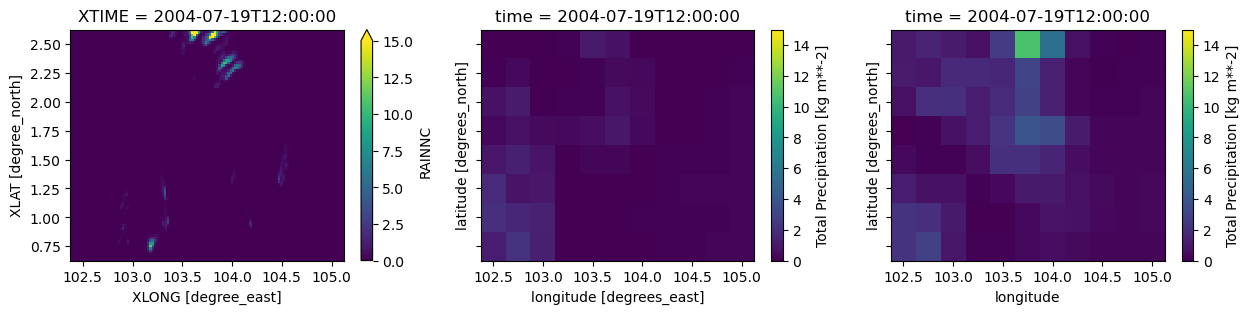

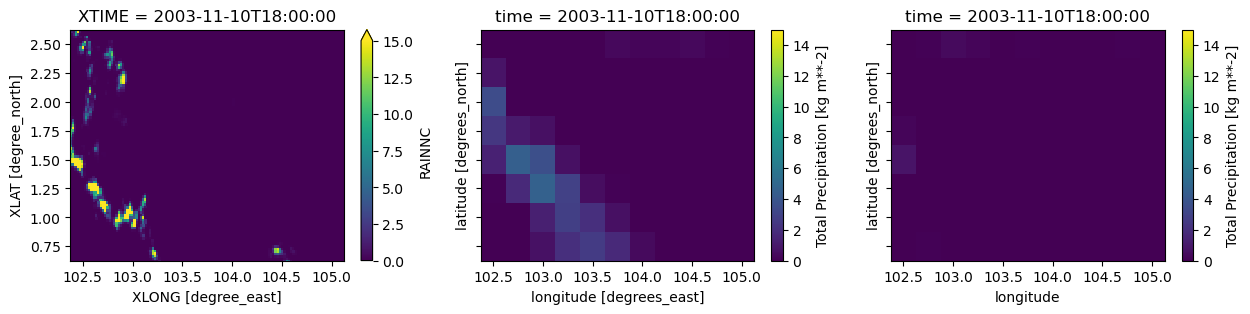

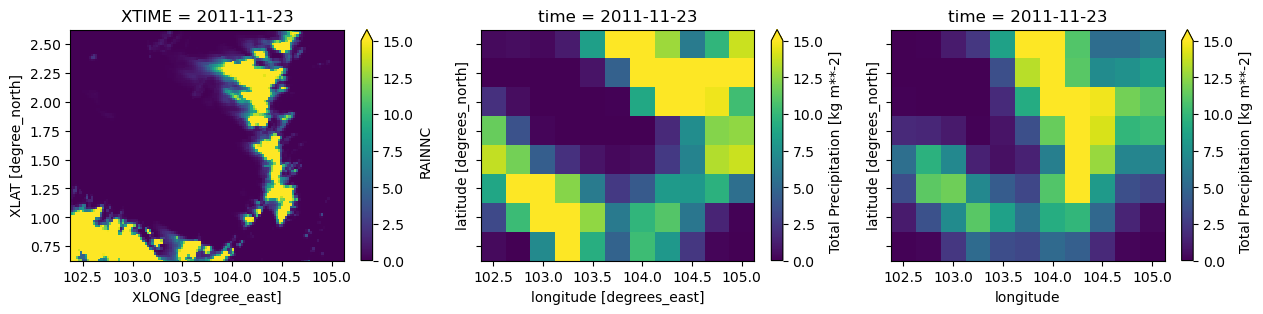

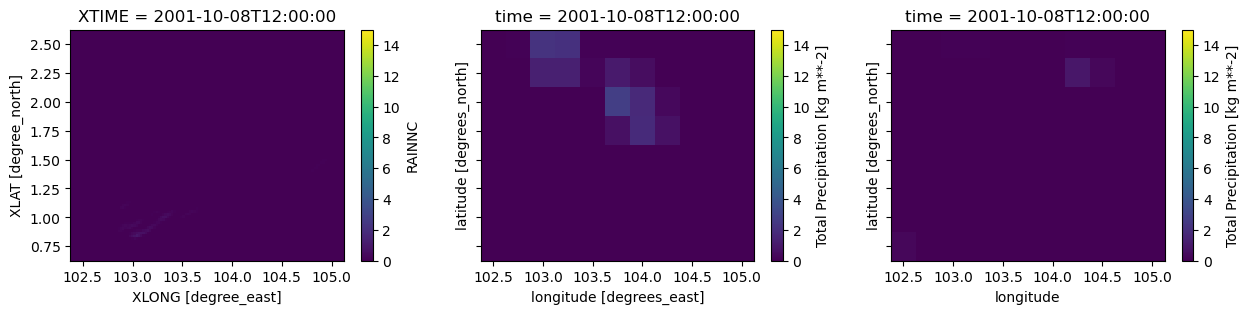

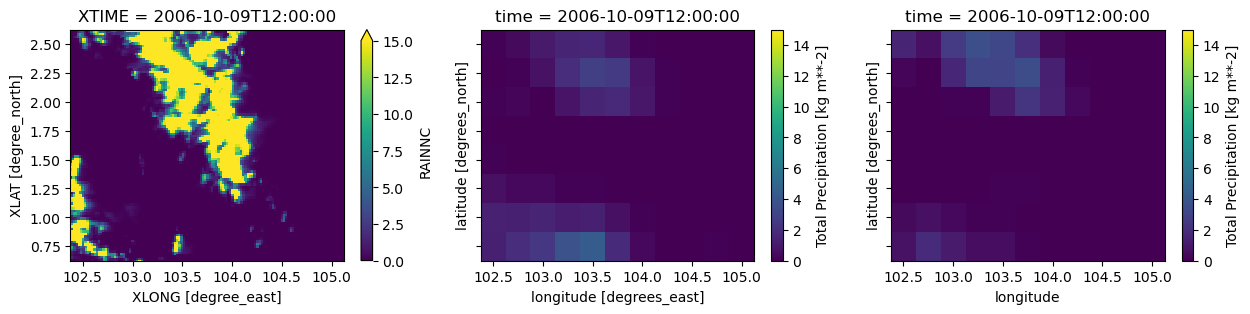

In [10]:
from locale import normalize
from matplotlib.pyplot import tight_layout

timelst = []
for _ in range(10):
    timelst.append(np.random.randint(0,20457))

for time in timelst:
   fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,3), sharex='all', sharey='all') # add this statement before your plot
   wrf_train.RAINNC.isel(Time=time).plot(x='XLONG', y='XLAT', ax=ax1, norm=mpl.colors.Normalize(vmax=15, vmin=0))         # WRF (RAINNC is actually tp)
   y_train.tp.isel(time=time).plot(x='lon', y='lat', ax=ax2, norm=mpl.colors.Normalize(vmax=15, vmin=0))                # reanalysis 
   ds_train_apcp.tp.isel(time=time).plot(x='longitude', y='latitude', ax=ax3, norm=mpl.colors.Normalize(vmax=15, vmin=0)) # reforecast
   plt.show(tight_layout)

   # column 1 = WRF, column 2 = reanalysis, column 3 = reforecast